In [36]:
!pip install matplotlib

  Obtaining dependency information for matplotlib from https://files.pythonhosted.org/packages/40/d9/c1784db9db0d484c8e5deeafbaac0d6ed66e165c6eb4a74fb43a5fa947d9/matplotlib-3.8.0-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for contourpy>=1.0.1 from https://files.pythonhosted.org/packages/e5/76/94bc17eb868f8c7397f8fdfdeae7661c1b9a35f3a7219da308596e8c252a/contourpy-1.1.1-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for cycler>=0.10 from https://files.pythonhosted.org/packages/2b/b3/70c33027c4918c10ccf176014b38f8b91cb18ac018a78854543a4fc72609/cycler-0.12.0-py3-none-any.whl.metadata
  Obtaining dependency information for fonttools>=4.22.0 from https://files.pythonhosted.org/packages/55/a7/5936376afaeaca384c9604ac15311edd1a03a520b4f1eef31da2b42148f1/fonttools-4.43.0-cp311-cp311-win_amd64.whl.metadata
     ---------------------------------------- 0.0/155.0 kB ? eta -:--:--
     --------------- ----------------------- 61.4/155.0 kB 1.7 MB/s e

In [37]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

In [38]:
# Define a simple generator and discriminator
class Generator(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(Generator, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        self.fc2 = nn.Linear(hidden_dim, output_dim)

    def forward(self, z):
        x = torch.relu(self.fc1(z))
        x = torch.sigmoid(self.fc2(x))
        return x

class Discriminator(nn.Module):
    def __init__(self, input_dim, hidden_dim):
        super(Discriminator, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        self.fc2 = nn.Linear(hidden_dim, 1)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.sigmoid(self.fc2(x))
        return x

In [39]:
# Hyperparameters
input_dim = 10  
hidden_dim = 16  
output_dim = 10  

In [40]:
# Initialize generator and discriminator
generator = Generator(input_dim, hidden_dim, output_dim)
discriminator = Discriminator(output_dim, hidden_dim)


In [41]:
# Loss function and optimizer
criterion = nn.BCELoss()
optimizer_g = optim.Adam(generator.parameters(), lr=0.001)
optimizer_d = optim.Adam(discriminator.parameters(), lr=0.001)

In [42]:
# Training parameters
num_epochs = 10000
batch_size = 64
real_labels = torch.ones(batch_size, 1)
fake_labels = torch.zeros(batch_size, 1)

In [43]:
# Training loop
for epoch in range(num_epochs):
    # Generate random noise as input to the generator
    noise = torch.randn(batch_size, input_dim)
    
    # Generate a random graph using the generator
    generated_graph = generator(noise)
    
    # Train the discriminator
    optimizer_d.zero_grad()
    real_output = discriminator(torch.rand(batch_size, output_dim))
    fake_output = discriminator(generated_graph)
    loss_real = criterion(real_output, real_labels)
    loss_fake = criterion(fake_output, fake_labels)
    loss_d = loss_real + loss_fake
    loss_d.backward()
    optimizer_d.step()
    
    # Train the generator
    optimizer_g.zero_grad()
    noise = torch.randn(batch_size, input_dim)
    generated_graph = generator(noise)
    fake_output = discriminator(generated_graph)
    loss_g = criterion(fake_output, real_labels)
    loss_g.backward()
    optimizer_g.step()

    # Print progress
    if (epoch + 1) % 1000 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss D: {loss_d.item()}, Loss G: {loss_g.item()}')

Epoch [1000/10000], Loss D: 1.463039755821228, Loss G: 0.6958401799201965
Epoch [2000/10000], Loss D: 1.5338068008422852, Loss G: 0.6978455781936646
Epoch [3000/10000], Loss D: 1.4265055656433105, Loss G: 0.6856279373168945
Epoch [4000/10000], Loss D: 1.2502639293670654, Loss G: 0.7403824329376221
Epoch [5000/10000], Loss D: 1.3776133060455322, Loss G: 0.7039090394973755
Epoch [6000/10000], Loss D: 1.4625968933105469, Loss G: 0.705826461315155
Epoch [7000/10000], Loss D: 1.366822361946106, Loss G: 0.6753538846969604
Epoch [8000/10000], Loss D: 1.2813502550125122, Loss G: 0.6804006695747375
Epoch [9000/10000], Loss D: 1.4775457382202148, Loss G: 0.7177470326423645
Epoch [10000/10000], Loss D: 1.1801600456237793, Loss G: 0.8000288009643555


In [44]:
# Generate and visualize a sample graph
sample_noise = torch.randn(1, input_dim)
sampled_graph = generator(sample_noise).detach().numpy()

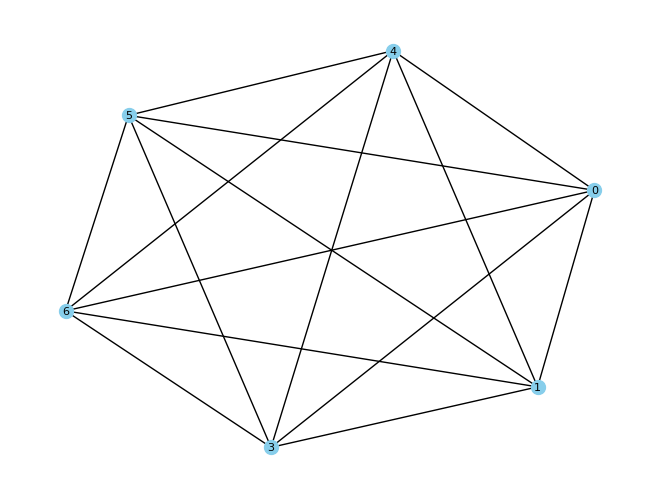

In [45]:
# Create a graph using NetworkX and visualize it
G = nx.Graph()
for i in range(output_dim):
    for j in range(i + 1, output_dim):
        if sampled_graph[0, i] > 0.5 and sampled_graph[0, j] > 0.5:
            G.add_edge(i, j)

nx.draw(G, with_labels=True, node_size=100, node_color='skyblue', font_size=8)
plt.show()